In [1]:
import sys
sys.path.insert(0, '../../src')
from utils import preprocession as prep
from utils.metrics import compute_metric, add_to_metrics, columns
from utils import visualization as vis
from models.SVM import train_SVM_models, train_LR_models, predict_from_models

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl




In [7]:
folder_name = 'Smartvote'
data_name = 'Binary'

train, test = prep.load_data(folder_name, data_name)
train_users, train_reactions = train
test_users, test_reactions = test

p = 0

method_path = f"../../embeddings/PCA/{folder_name}/{data_name}"

train_embedding = pd.read_csv(f'{method_path}/train_embedding_{p}.csv', index_col=0)

In [8]:
%%time
LR_models = train_LR_models(train_embedding.values, train_reactions[p])

CPU times: user 133 ms, sys: 2 ms, total: 135 ms
Wall time: 135 ms


In [9]:
%%time
SVM_models = train_SVM_models(train_embedding.values, train_reactions[p])

CPU times: user 8.02 s, sys: 10.3 ms, total: 8.03 s
Wall time: 8.06 s


## Visualization

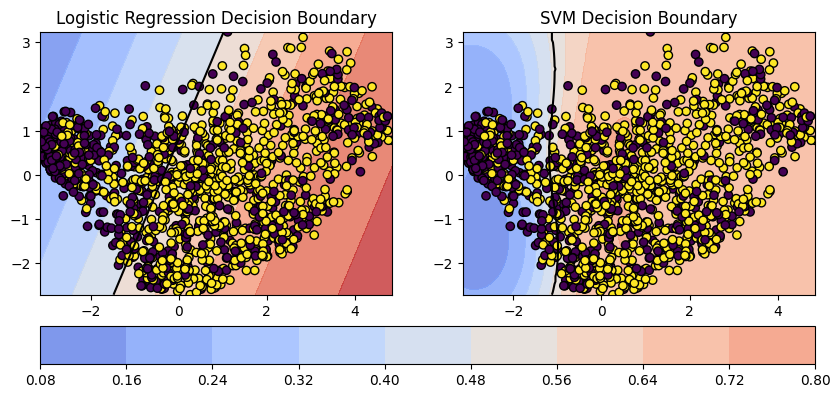

In [15]:
def plot_feature(embedding, k):
    fig, axes = plt.subplots(ncols=2, figsize=(10,8))
        
    # Create a dense grid of values
    x_min, y_min = embedding.min(axis=0)
    x_max, y_max = embedding.max(axis=0)    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    for i in range(2):
        ax = axes[i]
        
        if i==0:
            title = 'Logistic Regression Decision Boundary'
            # Use the model to predict the probabilities for each point on the grid
            Z = LR_models[str(k)].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)

            # Plot the decision boundary (where Z = 0.5)
            ax.contour(xx, yy, Z, levels=[0.5], colors='black')
            
            # Plot heatmap of probability
            contour = ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm, vmin=0, vmax=1)

        if i==1:
            title = 'SVM Decision Boundary'
            # Use the model's decision function to get the distance to the decision boundary
            #Z = SVM_models[k].decision_function(np.c_[xx.ravel(), yy.ravel()])
            #Z = Z.reshape(xx.shape)
            
            # Predict probabilities on the grid
            Z = SVM_models[str(k)].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)

            # Plot the decision boundary at 50% probability
            ax.contour(xx, yy, Z, levels=[0.5], colors='black')

            # Plot heatmap of probability
            contour = ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm, vmin=0, vmax=1)

            # Plot the decision boundary (where Z = 0.5)
            #ax.contour(xx, yy, Z, levels=[0], colors='red')

            # Plot the support vectors
            # ax.scatter(SVM_models[str(k)].support_vectors_[:, 0], SVM_models[str(k)].support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='o')
        
        # ax.plot([x_min,x_max], statements.iloc[k,4:6] , c='C'+str(k), linestyle='--')

        # Plot the data points
        ax.scatter(embedding.loc[:, 'x'], embedding.loc[:, 'y'], c=train_reactions[p].iloc[:,k], edgecolors='k')

        ax.set(title=title,
                xlim=(x_min, x_max),
                ylim=(y_min, y_max),
                aspect='equal'
          )
    # Create a colorbar with limits from 0 to 1
    fig.colorbar(contour, ax=axes, orientation='horizontal', pad=0.05)

plot_feature(train_embedding, 0)

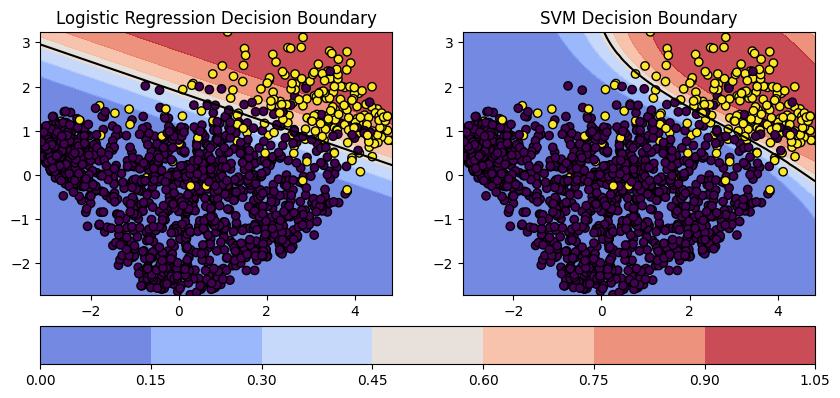

In [16]:
plot_feature(train_embedding, 5)

## Predictions

In [17]:
LR_models.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74'])

In [18]:
predict_from_models(LR_models, train_embedding.values).shape

(1622, 75)